In [1]:
import numpy as np 
import pandas as pd

from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import Normalizer

from sklearn.svm import SVC

from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score)

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
traindata = pd.read_csv('kdd/binary/Training.csv', header=None)
testdata = pd.read_csv('kdd/binary/Testing.csv', header=None)

X,Y = traindata.iloc[:,1:42], traindata.iloc[:,0]
C,T = testdata.iloc[:,0] ,testdata.iloc[:,1:42]

scaler = Normalizer().fit(X)
trainX = scaler.transform(X) #scale / normalize X.

traindata = np.array(trainX) #convert to np array()
trainlabel = np.array(Y) #convert to np array()

scaler = Normalizer().fit(T) #scale/ normalize x_te
testT = scaler.transform(T) 

testdata = np.array(testT) #convert to np array()
testlabel = np.array(C) #convert to np array()

In [13]:
import time
classifiers = ["Logistic Regression ", "Naive Bayes", "Decision Trees", "Ensemble Model : Random Forest"]
classifier_deets = []

#Logistic
start = time.time()
lr_model = LogisticRegression()
lr_model.fit(traindata, trainlabel)
print("LR model built in",round(time.time()-start,3),"s")
expected = testlabel
lr_predicted = lr_model.predict(testdata)
lr_proba = lr_model.predict_proba(testdata)

y_train1 = expected
y_pred = lr_predicted

accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="binary")
precision = precision_score(y_train1, y_pred , average="binary")
f1 = f1_score(y_train1, y_pred, average="binary")

classifier_deets.append([accuracy, recall, precision, f1]) #acc, rec, pre, f1. Print in that order.

#Naive Bayes


nb_model = GaussianNB()
nb_model.fit(traindata, trainlabel)
print("NB model built in",round(time.time()-start,3),"s")
expected = testlabel
nb_predicted = nb_model.predict(testdata)
nb_proba = nb_model.predict_proba(testdata)

y_train1 = expected
y_pred = nb_predicted

accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="binary")
precision = precision_score(y_train1, y_pred , average="binary")
f1 = f1_score(y_train1, y_pred, average="binary")

classifier_deets.append([accuracy, recall, precision, f1])

# DT


dt_model = DecisionTreeClassifier()
dt_model.fit(traindata, trainlabel)
print("Decision Tree model built in",round(time.time()-start,3),"s")
expected = testlabel
dt_predicted = dt_model.predict(testdata)
dt_proba = dt_model.predict_proba(testdata)

y_train1 = expected
y_pred = dt_predicted

accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="binary")
precision = precision_score(y_train1, y_pred , average="binary")
f1 = f1_score(y_train1, y_pred, average="binary")

classifier_deets.append([accuracy, recall, precision, f1])

# RF

start=time.time()
rf_model = RandomForestClassifier(n_estimators = 150)
rf_model.fit(traindata, trainlabel)
print("Random Forest model built in",round(time.time()-start,3),"s")
expected = testlabel
rf_predicted = rf_model.predict(testdata)
rf_proba = rf_model.predict_proba(testdata)

y_train1 = expected
y_pred = rf_predicted

accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="binary")
precision = precision_score(y_train1, y_pred , average="binary")
f1 = f1_score(y_train1, y_pred, average="binary")

classifier_deets.append([accuracy, recall, precision, f1])

for i in range(len(classifiers)):
    print(classifiers[i],":")
    print("Accuracy : ", classifier_deets[i][0])
    print("Recall : ", classifier_deets[i][1])
    print("Precision : ", classifier_deets[i][2])
    print("F1 Score : ", classifier_deets[i][3])
    print("**************************************\n")

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR model built in 2.756 s
NB model built in 3.513 s
Decision Tree model built in 10.389 s
Random Forest model built in 76.226 s
Logistic Regression  :
Accuracy :  0.8480720447289481
Recall :  0.8208444472839368
Precision :  0.988521610340649
F1 Score :  0.89691355870085
**************************************

Naive Bayes :
Accuracy :  0.9294695992978147
Recall :  0.9232418661853727
Precision :  0.9883980900024366
F1 Score :  0.9547095876439777
**************************************

Decision Trees :
Accuracy :  0.9300676142739102
Recall :  0.9144052771965692
Precision :  0.9986263436757299
F1 Score :  0.9546618975260083
**************************************

Ensemble Model : Random Forest :
Accuracy :  0.926505245491578
Recall :  0.9098811672443259
Precision :  0.9987289454191631
F1 Score :  0.9522370782690093
**************************************



In [10]:
traindata.shape

(494021, 41)

In [11]:
testdata.shape

(311029, 41)

In [23]:
labels = ['LR','NB','DT','RF']
acc,rec,pre,f1 = [],[],[],[]
for i in range(len(classifier_deets)):
    acc.append(classifier_deets[i][0])
    rec.append(classifier_deets[i][1])
    pre.append(classifier_deets[i][2])
    f1.append(classifier_deets[i][3])
df = pd.DataFrame(zip(acc,rec,pre,f1),index = labels,columns = ['Accuracy','Recall','Precision','F1 Score'])
df

,Accuracy,Recall,Precision,F1 Score
LR,0.848072,0.820844,0.988522,0.896914
NB,0.929470,0.923242,0.988398,0.954710
DT,0.930068,0.914405,0.998626,0.954662
RF,0.926505,0.909881,0.998729,0.952237


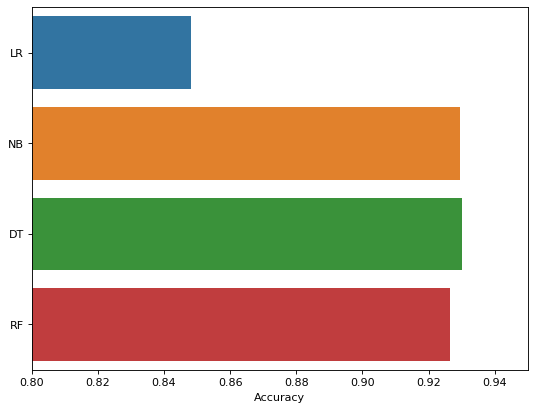

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlim(0.8,0.95)
sns.barplot(x="Accuracy", y=labels, data=df)

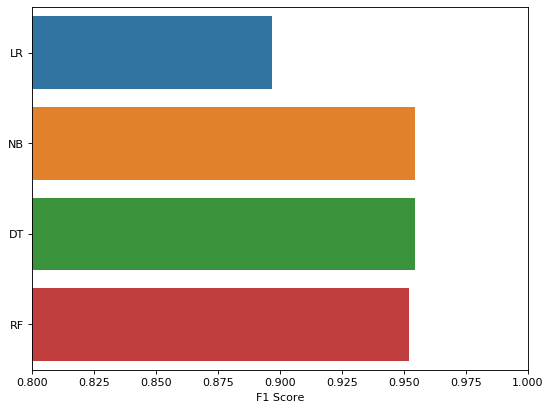

In [43]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlim(0.8,1.0)
sns.barplot(x="F1 Score", y=labels, data=df)